<a href="https://colab.research.google.com/github/brunasil98/Colab_Semiconductor/blob/main/Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2

from PIL import Image
import numpy as np


In [ ]:
import tensorflow.keras.utils as conv_utils

In [ ]:
image_directory = r'drive/MyDrive/Youtube_Neural_Network/'
SIZE = 128
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

Error = os.listdir(image_directory + 'Error/')
for i, image_name in enumerate(Error):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread (image_directory + 'Error/' + image_name,cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image, mode = 'L')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)
             
   
     

In [ ]:
      
plt.show(image) 

In [ ]:
Non_error = os.listdir(image_directory + 'Non_error/')
for i, image_name in enumerate(Non_error):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Non_error/' + image_name,cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image, mode = 'L')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [ ]:

X_train = conv_utils.normalize(X_train)
X_test = conv_utils.normalize(X_test)


In [ ]:
X_train = np.array(X_train).reshape(len(X_train),X_train.shape[1],X_train.shape[2],1)
y_train = np.array(y_train).reshape(len(y_train),1)
X_test = np.array(X_test).reshape(len(X_test),X_test.shape[1],X_test.shape[2],1)
y_test = np.array(y_test).reshape(len(y_test),1)

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 1)   #change to (SIZE, SIZE, 1)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1))
model.add(Activation('sigmoid')) 
model.add(BatchNormalization()) 

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['acc'])

print(model.summary())    
###############################################################  


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
activation_50 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_51 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 32)      

In [ ]:
# X_train = X_train.reshape(len(X_train),  128, 128, 1)
# y_train = y_train.reshape(len(y_train), 1)

# X_train = np.array(X_train).reshape(len(X_train),X_train.shape[1],X_train.shape[2],1)
# y_train = np.array(y_train).reshape(len(y_train),1)
# X_test = np.array(X_test).reshape(len(X_test),X_test.shape[1],X_test.shape[2],1)
# y_test = np.array(y_test).reshape(len(y_test),1)

In [ ]:
X_test.shape

(72, 128, 128, 1)

In [ ]:
X_train.shape

(285, 128, 128, 1)

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 300,      
                         validation_split= 0.1,
                         shuffle = True
                     )


model.save('semiconductor_model2_300epochs_2.h5')  


Epoch 1/300
4/4 [==============================] - 5s 1s/step - loss: 5.5988 - acc: 0.5000 - val_loss: 0.7747 - val_acc: 0.4483
Epoch 2/300
4/4 [==============================] - 5s 1s/step - loss: 4.5321 - acc: 0.5352 - val_loss: 1.1823 - val_acc: 0.4483
Epoch 3/300
4/4 [==============================] - 5s 1s/step - loss: 4.4113 - acc: 0.5391 - val_loss: 1.3866 - val_acc: 0.4483
Epoch 4/300
4/4 [==============================] - 5s 1s/step - loss: 3.1886 - acc: 0.5508 - val_loss: 1.2334 - val_acc: 0.4483
Epoch 5/300
4/4 [==============================] - 5s 1s/step - loss: 3.1956 - acc: 0.5508 - val_loss: 1.2774 - val_acc: 0.4483
Epoch 6/300
4/4 [==============================] - 5s 1s/step - loss: 3.0411 - acc: 0.5312 - val_loss: 1.4159 - val_acc: 0.4483
Epoch 7/300
4/4 [==============================] - 5s 1s/step - loss: 3.1856 - acc: 0.5508 - val_loss: 1.3490 - val_acc: 0.4483
Epoch 8/300
4/4 [==============================] - 5s 1s/step - loss: 3.0448 - acc: 0.5273 - val_loss: 1

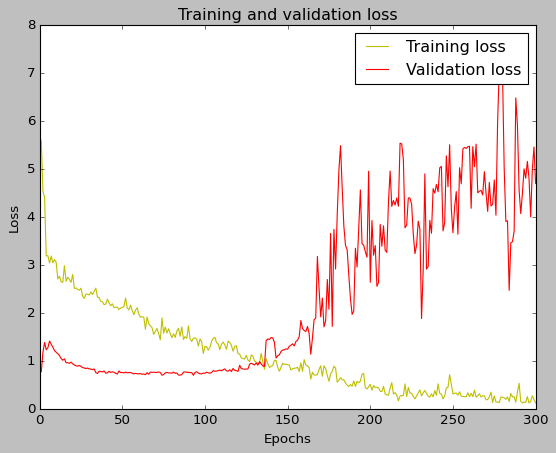

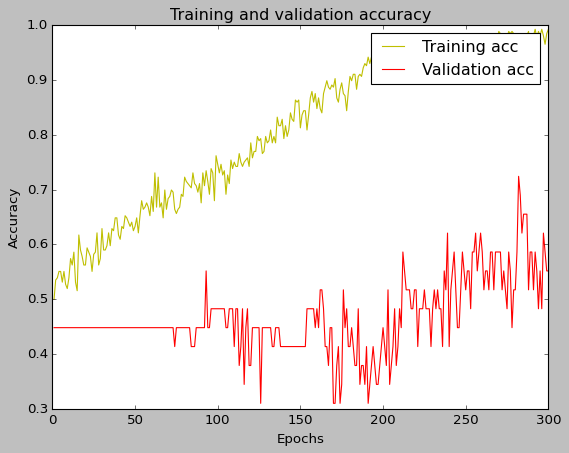

In [ ]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

TypeError: ignored

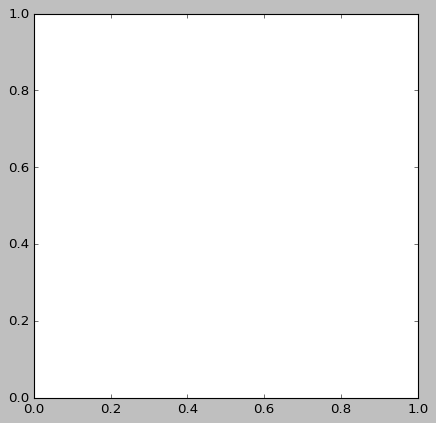

In [ ]:
n=23  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)


In [ ]:
import tensorflow as tf

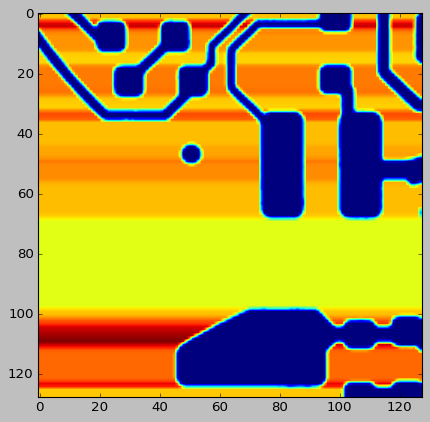

In [ ]:
plt.imshow(tf.squeeze(img) )

In [ ]:
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

The prediction for this image is:  [[0.88840973]]
The actual label for this image is:  [0]


In [ ]:
from keras.models import load_model
# # load model
model = load_model('semiconductor_model_300epochs_2.h5')



In [ ]:

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

3/3 [==============================] - 1s 96ms/step - loss: 0.7228 - acc: 0.5556
Accuracy =  55.55555820465088 %


In [ ]:
mythreshold=0.908
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

In [ ]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [ ]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

In [ ]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)